<a href="https://colab.research.google.com/github/avs123a/Image-color-spaces-morphology-demo/blob/master/ColorSpacesAndImageMorphologyDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and load image

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


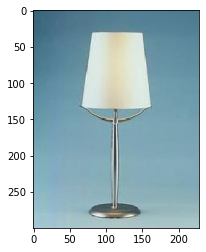

In [2]:
#import the required libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import cv2 

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

image = cv2.imread('/content/drive/My Drive/ColabNotebooks/images/etalons/lamp.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) 

Get RGB

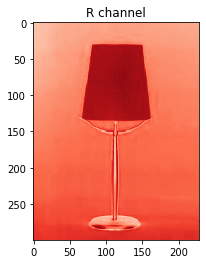

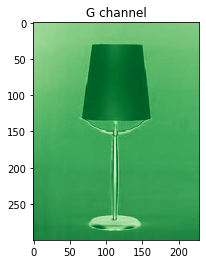

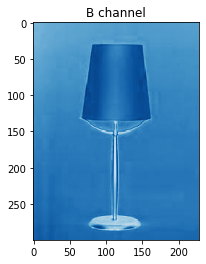

In [0]:
# extract channel
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

#show image
plt.title('R channel')
plt.imshow(red_channel, cmap="Reds")
plt.show()

plt.title('G channel')
plt.imshow(green_channel, cmap="Greens")
plt.show()

plt.title('B channel')
plt.imshow(blue_channel, cmap="Blues")
plt.show()


Convert to HSV

In [0]:
def rgb_to_hsv(arr):
    """
    convert rgb values in a numpy array to hsv values
    input and output arrays should have shape (M,N,3)
    """
    arr = arr.astype('float')  # <- add this line
    out = np.zeros(arr.shape, dtype=np.float)
    arr_max = arr.max(-1)
    ipos = arr_max > 0
    delta = arr.ptp(-1)
    s = np.zeros_like(delta)
    s[ipos] = delta[ipos] / arr_max[ipos]
    ipos = delta > 0
    # red is max
    idx = (arr[:, :, 0] == arr_max) & ipos
    out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
    # green is max
    idx = (arr[:, :, 1] == arr_max) & ipos
    out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
    # blue is max
    idx = (arr[:, :, 2] == arr_max) & ipos
    out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
    out[:, :, 0] = (out[:, :, 0] / 6.0) % 1.0
    out[:, :, 1] = s
    out[:, :, 2] = arr_max
    return out

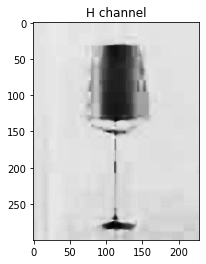

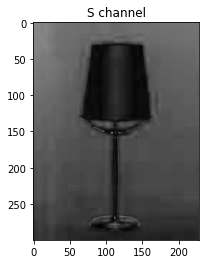

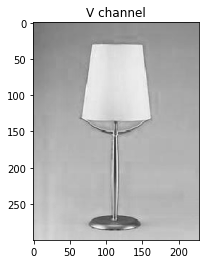

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


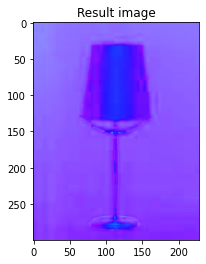

In [0]:
#converting image to HSV format
hsv_image = rgb_to_hsv(image)

# extract channel
h_channel = hsv_image[:,:,0]
s_channel = hsv_image[:,:,1]
v_channel = hsv_image[:,:,2]

#show image
plt.title('H channel')
plt.imshow(h_channel, cmap="gray")
plt.show()

plt.title('S channel')
plt.imshow(s_channel, cmap="gray")
plt.show()

plt.title('V channel')
plt.imshow(v_channel, cmap="gray")
plt.show()

plt.title('Result image')
plt.imshow(hsv_image)
plt.show()

Reverse conversion


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 52.  97. 116.]
  [ 52.  97. 116.]
  [ 52.  97. 116.]
  ...
  [ 76. 121. 142.]
  [ 76. 121. 142.]
  [ 76. 121. 142.]]

 [[ 52.  97. 116.]
  [ 52.  97. 116.]
  [ 53.  98. 117.]
  ...
  [ 76. 121. 142.]
  [ 76. 121. 142.]
  [ 76. 121. 142.]]

 [[ 53.  98. 117.]
  [ 53.  98. 117.]
  [ 53.  98. 117.]
  ...
  [ 76. 121. 142.]
  [ 76. 121. 142.]
  [ 76. 121. 142.]]

 ...

 [[167. 202. 206.]
  [167. 202. 206.]
  [167. 202. 208.]
  ...
  [170. 200. 202.]
  [170. 200. 202.]
  [170. 200. 202.]]

 [[166. 201. 205.]
  [167. 202. 206.]
  [167. 202. 208.]
  ...
  [170. 200. 202.]
  [170. 200. 202.]
  [170. 200. 202.]]

 [[166. 201. 205.]
  [167. 202. 206.]
  [167. 202. 208.]
  ...
  [170. 200. 202.]
  [170. 200. 202.]
  [170. 200. 202.]]]


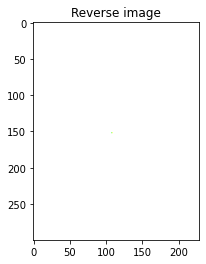

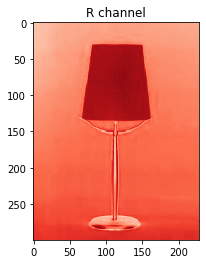

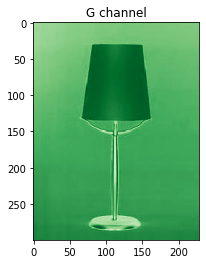

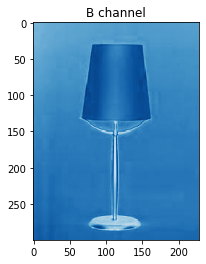

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


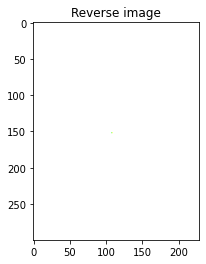

In [0]:
#converting HSV image to RGB format
rgb_image = matplotlib.colors.hsv_to_rgb(hsv_image)

# extract channel
red_channel = rgb_image[:,:,0]
green_channel = rgb_image[:,:,1]
blue_channel = rgb_image[:,:,2]

#show image
plt.title('R channel')
plt.imshow(red_channel, cmap="Reds")
plt.show()

plt.title('G channel')
plt.imshow(green_channel, cmap="Greens")
plt.show()

plt.title('B channel')
plt.imshow(blue_channel, cmap="Blues")
plt.show()

plt.title('Reverse image')
plt.imshow(rgb_image)
plt.show()

**Morphological operations demo**

Erosion and dilation

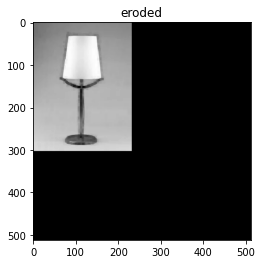

In [24]:
def erosion(image, padding=0):
  reflect = cv2.copyMakeBorder(grey,padding,padding,padding,padding,cv2.BORDER_REFLECT)

  imgEroded = np.zeros((512+6,512+6), np.uint8)

  for i in range(0,reflect.shape[0]):
      for j in range(0,reflect.shape[1]):
          n = np.matrix(reflect[i-2:i+3, j-2:j+3])
          if n.size > 0:  
              imgEroded[i][j] = n.min()

  imgEroded = imgEroded[3:512+3, 3:512+3]

  return imgEroded

grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgEroded = erosion(grey, 3)

plt.title('eroded')
plt.imshow(imgEroded, cmap="gray")
plt.show()

Image is 
 [[ 98  98  98 ... 122 122 122]
 [ 98  98  99 ... 122 122 122]
 [ 99  99  99 ... 122 122 122]
 ...
 [199 199 200 ... 197 197 197]
 [198 199 200 ... 197 197 197]
 [198 199 200 ... 197 197 197]]
kernel is 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
Vertical Window limit: 299
Horizontal Window limit: 228


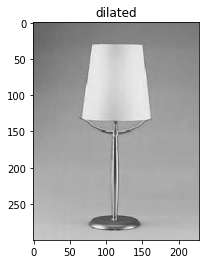

In [35]:
def dilation(image, kernel, padding=0):
    img_operated = image.copy() #this will be the image
    padded = cv2.copyMakeBorder(image,padding,padding,padding,padding,cv2.BORDER_REFLECT)

    print("Image is \n",  image)
    print("kernel is \n",kernel)
    print("="*40)

    vertical_window = padded.shape[0] - kernel.shape[0] #final vertical window position
    horizontal_window = padded.shape[1] - kernel.shape[1] #final horizontal window position

    print("Vertical Window limit: {}".format(vertical_window))
    print("Horizontal Window limit: {}".format(horizontal_window))
    print("="*40)

    #start with vertical window at 0 position
    vertical_pos = 0
    values = kernel.flatten() #to compare with values with overlapping element for erosion

    #sliding the window vertically
    while vertical_pos <= (vertical_window):
        horizontal_pos = 0

        #sliding the window horizontally
        while horizontal_pos <= (horizontal_window):
            dilation_flag = False
            erosion_flag = False
            index_position = 0

            #gives the index position of the box
            for i in range(vertical_pos, vertical_pos+kernel.shape[0]):
                for j in range(horizontal_pos, horizontal_pos+kernel.shape[0]):
                  #if we find 1, then break the second loop
                  if padded[i][j] == 1:
                    dilation_flag = True
                    break
                    
                if dilation_flag is True:
                    img_operated[vertical_pos, horizontal_pos] = 1
                    break

            #increase the horizontal window position
            horizontal_pos += 1

        #increase the vertical window position
        vertical_pos += 1

    return img_operated


kernel = np.array ([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype = np.uint8)

imgDilated = dilation(np.asarray(grey), kernel, 1)
plt.title('dilated')
plt.imshow(imgDilated, cmap="gray")
plt.show()

Opening and closing image

Image is 
 [[98 98 98 ...  0  0  0]
 [98 98 99 ...  0  0  0]
 [99 99 99 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
kernel is 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
Vertical Window limit: 511
Horizontal Window limit: 511


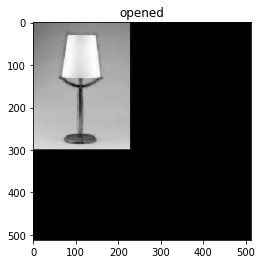

In [38]:
def opening(img,padding):
    eroded = erosion(img,padding)
    open_img = dilation(np.asarray(eroded), kernel, padding)
    return open_img


imgOpened = opening(grey, 1)

plt.title('opened')
plt.imshow(imgOpened, cmap="gray")
plt.show()

Image is 
 [[ 98  98  98 ... 122 122 122]
 [ 98  98  99 ... 122 122 122]
 [ 99  99  99 ... 122 122 122]
 ...
 [199 199 200 ... 197 197 197]
 [198 199 200 ... 197 197 197]
 [198 199 200 ... 197 197 197]]
kernel is 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
Vertical Window limit: 299
Horizontal Window limit: 228


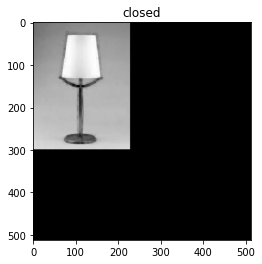

In [40]:
def closing(img,padding):
    dilate = dilation(np.asarray(img), kernel, padding)
    close_img = erosion(dilate,padding)
    return close_img

imgClosed = closing(grey, 1)

plt.title('closed')
plt.imshow(imgClosed, cmap="gray")
plt.show()